In [143]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Importar el documento soporte de la carpeta src

from src import soporte as sp


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

**Ejercicio**

**Fase 1**: Exploración y Limpieza

1) **Exploración Inicial:**

*Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

*Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

*Une los dos conjuntos de datos de la forma más eficiente.

In [144]:
# Importar los dos dataframes para poder abrirlos y trabajar sobre ellos

df_flight = pd.read_csv("data/Customer Flight Activity.csv")

df_history = pd.read_csv("data/Customer Loyalty History.csv")

In [145]:
# Conocer los datos de los dataframe

df_flight.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [146]:
df_history.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [147]:
# Saber el tamaño de los dataframes

print(f"El número de filas que tenemos para el dataframe de flight analysis {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

print(f"El número de filas que tenemos para el dataframe de loyalty history es {df_history.shape[0]}, y el número de columnas es {df_history.shape[1]}")


El número de filas que tenemos para el dataframe de flight analysis 405624, y el número de columnas es 10
El número de filas que tenemos para el dataframe de loyalty history es 16737, y el número de columnas es 16


In [148]:
# Columnas de los dataframes 

print(f"Los nombres de las columnas del dataframe de flight analysis son: \n {df_flight.columns}")
print('---------------------------------------------------------------------------------------------------')
print(f"Los nombres de las columnas del dataframe de loyalty history son: \n {df_history.columns}")

Los nombres de las columnas del dataframe de flight analysis son: 
 Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')
---------------------------------------------------------------------------------------------------
Los nombres de las columnas del dataframe de loyalty history son: 
 Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


In [149]:
# Verificar el tipo de columnas que hay

df_flight.info()

# de esta tabla, podemos concluir que todas las columnas son numericas (o int o float), y que no tenemos ningún nulo en sus celdas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [150]:
df_history.info()

# Para esta tabla podemos concluir que hay columnas numericas y categoricas y tenemos nulos en tres columnas: Salary, Cancellation Year, Cancellation Month               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [151]:
# Verificar los duplicados de los dataframes

print(f"Los duplicados para el dataframe de flight analysis es de: {df_flight.duplicated().sum()}")

print(f"Los duplicados para el dataframe de loyalty history es de: {df_history.duplicated().sum()}")

Los duplicados para el dataframe de flight analysis es de: 1864
Los duplicados para el dataframe de loyalty history es de: 0


In [153]:
# Hay duplicados en la primera tabla, por esto tenemos que evaluar mejor estos duplicados, para saber si podemos borrarlos o no del dataframe.

dupli = df_flight[df_flight.duplicated(keep=False)]

dupli

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [154]:
# Eliminar estas filas duplicadas y mantener la última ocurrencia

df_flight_sin_duplicados = df_flight.drop_duplicates(keep='last')

df_flight_sin_duplicados.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [155]:
# Verificación después de eliminar los duplicados

print("Número de filas originales:", len(df_flight))
print("Número de filas después de eliminar duplicados:", len(df_flight_sin_duplicados))

Número de filas originales: 405624
Número de filas después de eliminar duplicados: 403760


In [156]:
df_flight_sin_duplicados.duplicated().sum()

0

In [157]:
# hacer un describe para entender mejor las variables numericas de los dataframes

df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [158]:
# sacamos la misma info para la tabla sin los duplicados para poder ver si hay diferencias

df_flight_sin_duplicados.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [159]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [160]:
# hacemos el mismo metodo, pero para las columnas categoricas del datafram loyalty history, ya que el otro no tiene columnas categoricas

df_history.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [161]:
# Muestra los principales estadísticos para las columnas categoricas del dataframe loyalty history

df_history_categorica = df_history.select_dtypes(include="object")

# creamos una variable con los nombres de las columnas del DataFrame de las variables categóricas utilizando el método '.columns'
columnas_cat = df_history_categorica.columns
print(f"Las columnas del DataFrame de variables categóricas son: \n {columnas_cat}")

# empezamos a iterar por cada una de las columnas para sacar principales estadisticos
for columna in columnas_cat:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_history[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_history[columna].value_counts()} ")

Las columnas del DataFrame de variables categóricas son: 
 Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY' -----------

Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos de las categorías son: Country
Canada    16737
Name: count, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE' -----------

Sus valores únicos son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Las frecuencias de los valores únicos de las categorías son: Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland    

In [162]:
# Como hemos visto arriba que solo la segunda tabla tiene nulos, vamos a mirar el % que tenemos de nulos para cada columna

porc_nulos = (df_history.isnull().sum() / df_history.shape[0]) * 100
porc_nulos

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [163]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


In [164]:
# Concluciones para las columnas que tenemos nulos:

# *Cancellation Year y Cancellation Month tenemos que seguir con los nulos, ya que son datos de la gente que ha cancelado el programa de leadad.
# *La columna Salary tiene un alto valor de % de nulos, y por esto seguiremos a analizarla para saber si podemos gestionar los nulos o no. 

In [165]:
# Unir los datos de la manera más eficiente.

# No tiene sentindo unir los datos simplesmente haciendo un merge, para repetir muchas veces los datos de cada cliente. 
# Así que la mejor decisión es primero unir los datos de los clientes de la tabla de flight y así, vamos a tener solo una fila para cada cliente, con las informaciones sumadas. 
# desués sí se puede hacer un merge 

In [166]:
df_flight_sin_duplicados['Year'].unique()

array([2017, 2018])

In [167]:
df_flight_sin_duplicados[df_flight_sin_duplicados['Loyalty Number'] == 100214].sort_values(['Year','Month'])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
3,100214,2017,1,0,0,0,0,0.00,0,0
16904,100214,2017,2,6,0,6,912,91.00,0,0
33805,100214,2017,3,0,0,0,0,0.00,0,0
50706,100214,2017,4,0,0,0,0,0.00,0,0
67607,100214,2017,5,0,0,0,0,0.00,0,0
101185,100214,2017,6,1,1,2,2514,251.00,459,37
101409,100214,2017,7,0,0,0,0,0.00,0,0
118310,100214,2017,8,1,1,2,3546,354.00,0,0
135211,100214,2017,9,6,0,6,1704,170.00,0,0
152112,100214,2017,10,10,0,10,1910,191.00,0,0


In [168]:
df_flight_sin_duplicados.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [169]:
df_flight_final = df_flight_sin_duplicados.groupby('Loyalty Number', as_index=False)[['Flights Booked', 'Flights with Companions',
                                                                                      'Total Flights','Distance','Points Accumulated',
                                                                                      'Points Redeemed','Dollar Cost Points Redeemed']].sum()

In [170]:
df_flight_final

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,157,35,192,50682,5376.00,1513,123
1,100102,173,42,215,40222,4115.25,1195,96
2,100140,152,38,190,41252,4184.25,593,48
3,100214,79,17,96,33982,3426.00,861,70
4,100272,127,36,163,40872,4108.04,1007,82
...,...,...,...,...,...,...,...,...
16732,999902,178,47,225,57227,6056.50,876,71
16733,999911,0,0,0,0,0.00,0,0
16734,999940,63,23,86,23410,2415.00,672,54
16735,999982,22,2,24,5948,594.00,0,0


In [ ]:
# Verificar si hay diferencia entre los Loyalty number entre las dos tablas

# Crear variables con los valores unicos que tienen las columnas

loyalty_id_hist = df_history['Loyalty Number'].unique()
loyalty_id_flight = df_flight_final['Loyalty Number'].unique()

In [ ]:
# Diferencia entre set para saber si algo esta de 'fuera' de la intersección

dif_loyalty_id = set(loyalty_id_flight).difference(set(loyalty_id_hist))
dif_loyalty_id

set()

In [ ]:
# Diferencia entre set para saber si algo esta de 'fuera' de la intersección

dif_loyalty_id2 = set(loyalty_id_hist).difference(set(loyalty_id_flight))
dif_loyalty_id2

set()

In [171]:
df_final = pd.merge(df_history, df_flight_final, on='Loyalty Number', how='left')

In [172]:
df_final.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,132,39,171,51877,5224.44,1418,115
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,190,25,215,41578,4176.04,1971,159
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,66,21,87,19664,1963.00,374,30
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,123,36,159,36043,3626.68,1291,105
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,132,44,176,36840,3689.68,0,0


In [ ]:
# Verificando si el index esta correcto

df_final.index

RangeIndex(start=0, stop=16737, step=1)

In [173]:
print(f"las filas y columnas que tenemos en el df_rp {df_flight_final.shape}")
print("-------------------------------------------------------------------")

print(f"las filas y columnas que tenemos en el df_in {df_history.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el inner_merge son {df_final.shape}")
print("-------------------------------------------------------------------")

las filas y columnas que tenemos en el df_rp (16737, 8)
-------------------------------------------------------------------
las filas y columnas que tenemos en el df_in (16737, 16)
-------------------------------------------------------------------
las filas y columnas que tenemos en el inner_merge son (16737, 23)
-------------------------------------------------------------------


In [178]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Country                      16737 non-null  object 
 2   Province                     16737 non-null  object 
 3   City                         16737 non-null  object 
 4   Postal Code                  16737 non-null  object 
 5   Gender                       16737 non-null  object 
 6   Education                    16737 non-null  object 
 7   Salary                       12499 non-null  float64
 8   Marital Status               16737 non-null  object 
 9   Loyalty Card                 16737 non-null  object 
 10  CLV                          16737 non-null  float64
 11  Enrollment Type              16737 non-null  object 
 12  Enrollment Year              16737 non-null  int64  
 13  Enrollment Month

2) **Limpieza de Datos:**

*Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
estén completos.

*Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
presenten de forma coherente.

*Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.

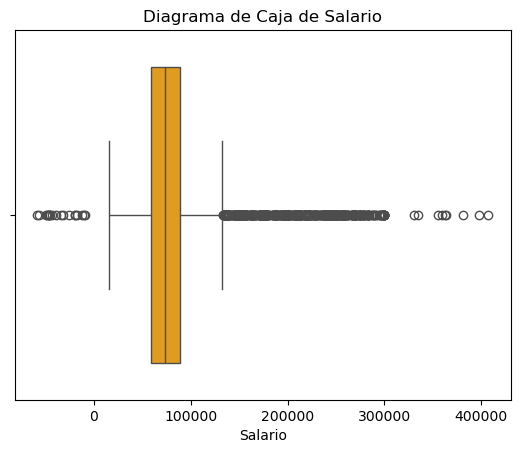

In [179]:
# Como comentado anteriomente, aquí seguiremos el analises de la columna de Salary, para gestionar sus nulos. 

# Como es una columna numerica, vamos a hacer una visualización en gráfica para saber si tiene valores outliers o no

sns.boxplot(x = 'Salary',
            data = df_final,
            color='orange')

# cambiamos el nombre del eje x
plt.xlabel('Salario')

# ponems título a la gráfica
plt.title('Diagrama de Caja de Salario');

#para guardar graficas: 

plt.savefig("imagenes/boxplot_salario.jpg", bbox_inches = "tight", pad_inches=0)


In [ ]:
# esta columna de Salary tiene muchos valores atípicos (positivos y negativos) por lo que optaremos por reemplazar los nulos con métodos más avanzados como
# KNNImputer y IterativeImputer. Para comparar aplicaremos los dos métodos a la columna y veremos si hay diferencias o no, para elegir el que mejor si encaje

In [229]:
df = df_final[(df_final['Salary'] < 0)]
df

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,1900,<NA>,58,15,73,16460,1650.84,814,66
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,1900,<NA>,72,16,88,15974,1691.00,587,47
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,1900,<NA>,100,32,132,30164,3124.75,0,0
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,1900,<NA>,23,7,30,8576,862.12,371,30
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,1900,<NA>,136,32,168,36567,3680.28,1514,122
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,1900,<NA>,64,13,77,16237,1649.04,0,0
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,1900,<NA>,30,9,39,10683,1067.00,0,0
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,1900,<NA>,64,13,77,17326,1749.50,979,80
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,1900,<NA>,88,8,96,20736,2376.00,0,0
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,1900,<NA>,0,0,0,0,0.00,0,0


In [231]:
df.shape

(20, 23)

In [200]:

def transformar_ano_en_fecha(df, columna):
    """
    Convierte una columna de años (float) en un DataFrame a tipo de dato fecha
    y devuelve solo el año de esa columna.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        columna (str): Nombre de la columna que contiene los años.

    Returns:
        pd.DataFrame: DataFrame con la columna transformada a fecha, con solo el año.
    """
    try:
        # Reemplazar NaN por un valor específico si es necesario (por ejemplo: 1900)
        df[columna] = df[columna].fillna(1900).astype(int)  # Reemplazar NaN y convertir a entero
        
        # Convertir la columna de años (ahora enteros) a fechas, utilizando el 1 de enero como fecha base
        df[columna] = pd.to_datetime(df[columna], format='%Y', errors='coerce')
        
        # Extraer solo el año
        df[columna] = df[columna].dt.year
    except Exception as e:
        print(f"Error al convertir la columna {columna} a fecha: {e}")
    
    return df

In [201]:
# Llamar a la funcion de transformar tipo de dato
df_final = transformar_ano_en_fecha(df_final, 'Cancellation Year')


In [209]:

def transformar_mes(columna):
    """
    Convierte una columna de meses en formato float a enteros,
    manteniendo los valores NaN intactos.

    Args:
        columna (pd.Series): Columna que contiene los meses en formato float.

    Returns:
        pd.Series: Columna transformada con valores de meses como enteros o NaN.
    """
    # Redondear o convertir a enteros los valores no NaN
    return columna.apply(lambda x: int(x) if not pd.isna(x) else np.nan)

In [221]:
# Crear función para transformar float a string

def float_a_int(dato):
    """
 Convierte un número float a entero, ignorando valores NaN.

    Args:
        dato (float): Número en formato float.

    Returns:
        int o NaN: Número convertido a entero, o NaN si el valor es NaN.
    """
    if pd.isna(dato):  # Si el dato es NaN, devuelve NaN
        return np.nan
    return int(dato)  # Convierte a entero si no es NaN

In [225]:
# Llamar la función
df_final['Cancellation Month'] = df_final['Cancellation Month'].apply(float_a_int).astype('Int64')


In [226]:
df_final['Cancellation Month'].dtype

Int64Dtype()

In [227]:
df_final.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,1900,<NA>,132,39,171,51877,5224.44,1418,115
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,1900,<NA>,190,25,215,41578,4176.04,1971,159
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018,1,66,21,87,19664,1963.00,374,30
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,1900,<NA>,123,36,159,36043,3626.68,1291,105
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,1900,<NA>,132,44,176,36840,3689.68,0,0


In [228]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Country                      16737 non-null  object 
 2   Province                     16737 non-null  object 
 3   City                         16737 non-null  object 
 4   Postal Code                  16737 non-null  object 
 5   Gender                       16737 non-null  object 
 6   Education                    16737 non-null  object 
 7   Salary                       12499 non-null  float64
 8   Marital Status               16737 non-null  object 
 9   Loyalty Card                 16737 non-null  object 
 10  CLV                          16737 non-null  float64
 11  Enrollment Type              16737 non-null  object 
 12  Enrollment Year              16737 non-null  int64  
 13  Enrollment Month